# Notebook Summary; Part1, Part 2 , Part 3 & Additional Deep Neural Parts

Data Set Summarry; https://www.kaggle.com/aljarah/xAPI-Edu-Data

* Description
* Students' Academic Performance Dataset (xAPI-Edu-Data)
* Data Set Characteristics: Multivariate
* 
* Number of Instances: 480
* 
* Area: E-learning, Education, Predictive models, Educational Data Mining
* 
* Attribute Characteristics: Integer/Categorical
* 
* Number of Attributes: 16
* 
* Date: 2016-11-8
* 
* Associated Tasks: Classification
* 
* Missing Values? No
* 
* File formats: xAPI-Edu-Data.csv
* 
* Source:
* Elaf Abu Amrieh, Thair Hamtini, and Ibrahim Aljarah, The University of Jordan, Amman, Jordan, http://www.Ibrahimaljarah.com
* www.ju.edu.jo


In [1]:
#ML Librarires 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import missingno as msno
import plotly.express as px
import  matplotlib.pyplot as plt


plt.style.use('seaborn')
%matplotlib inline

Data Read

In [2]:
df = pd.read_csv('../input/xAPI-Edu-Data/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.shape

(480, 17)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
df=df.sample(frac=1).reset_index(drop=True)

In [6]:
pd.DataFrame(df.isnull().sum(), columns=["Null Count"])

,Null Count
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


In [7]:
#Or 
#missing values cheacking
df.apply(lambda x: sum(x.isnull()),axis=0)

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [8]:
from sklearn import preprocessing

In [9]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [10]:
#Label Encoding

le = preprocessing.LabelEncoder()

# columns to select for encoding
selected_col = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                'SectionID', 'Topic', 'Semester', 'Relation','ParentAnsweringSurvey',
                'ParentschoolSatisfaction','StudentAbsenceDays', 'Class']

le.fit(df[selected_col].values.flatten())

df[selected_col] = df[selected_col].apply(le.fit_transform)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    480 non-null    int64
 1   NationalITy               480 non-null    int64
 2   PlaceofBirth              480 non-null    int64
 3   StageID                   480 non-null    int64
 4   GradeID                   480 non-null    int64
 5   SectionID                 480 non-null    int64
 6   Topic                     480 non-null    int64
 7   Semester                  480 non-null    int64
 8   Relation                  480 non-null    int64
 9   raisedhands               480 non-null    int64
 10  VisITedResources          480 non-null    int64
 11  AnnouncementsView         480 non-null    int64
 12  Discussion                480 non-null    int64
 13  ParentAnsweringSurvey     480 non-null    int64
 14  ParentschoolSatisfaction  480 non-null    

In [12]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,3,3,2,1,1,10,1,0,42,34,29,39,0,1,0,2
1,0,4,4,1,3,0,7,1,0,50,40,52,66,1,0,1,2
2,1,4,4,1,5,0,11,1,0,5,3,2,10,1,1,1,1
3,0,3,3,1,3,0,3,0,1,90,84,52,30,0,1,1,0
4,1,3,3,2,0,1,4,0,1,40,87,50,41,0,0,1,2


<AxesSubplot:>

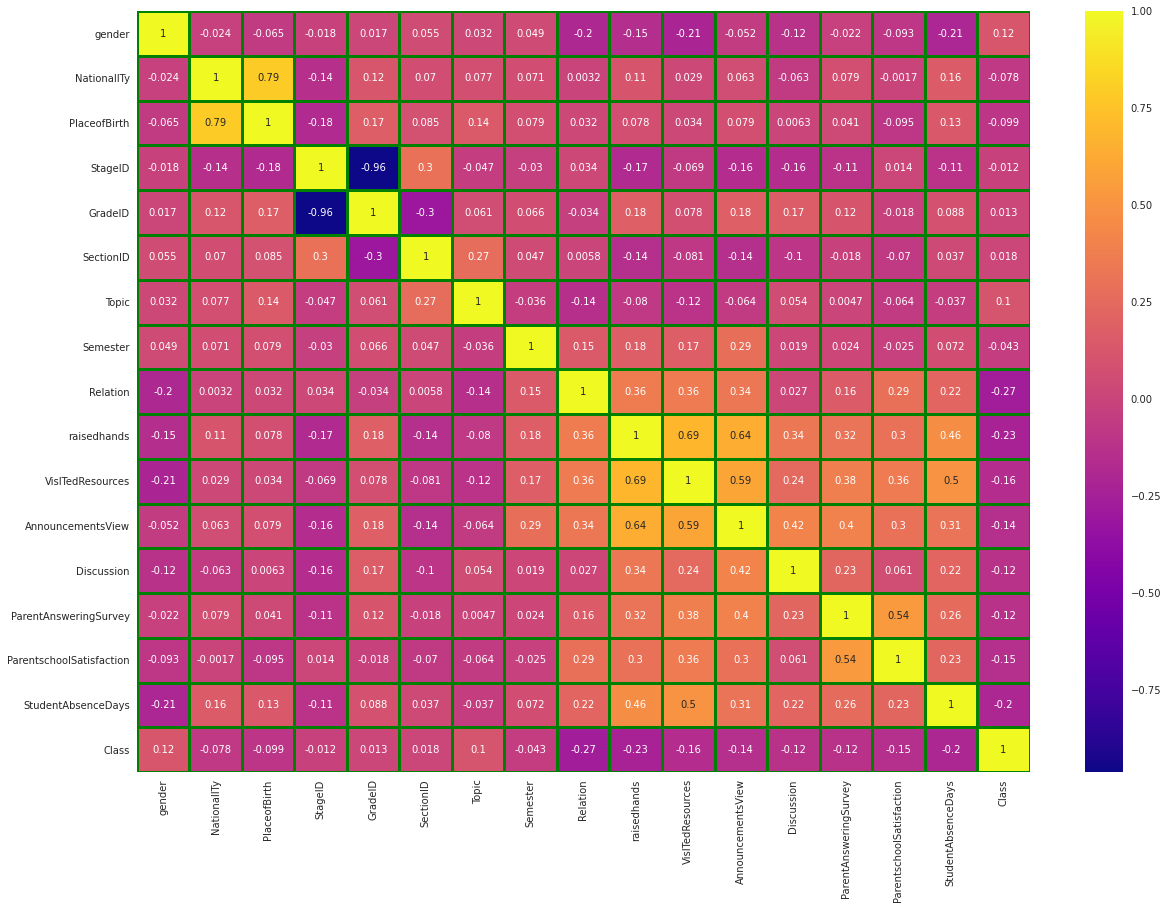

In [13]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidths=3,cmap = 'plasma')
#Data Cor-Relation

# Part 1

In [14]:
s=df.copy()

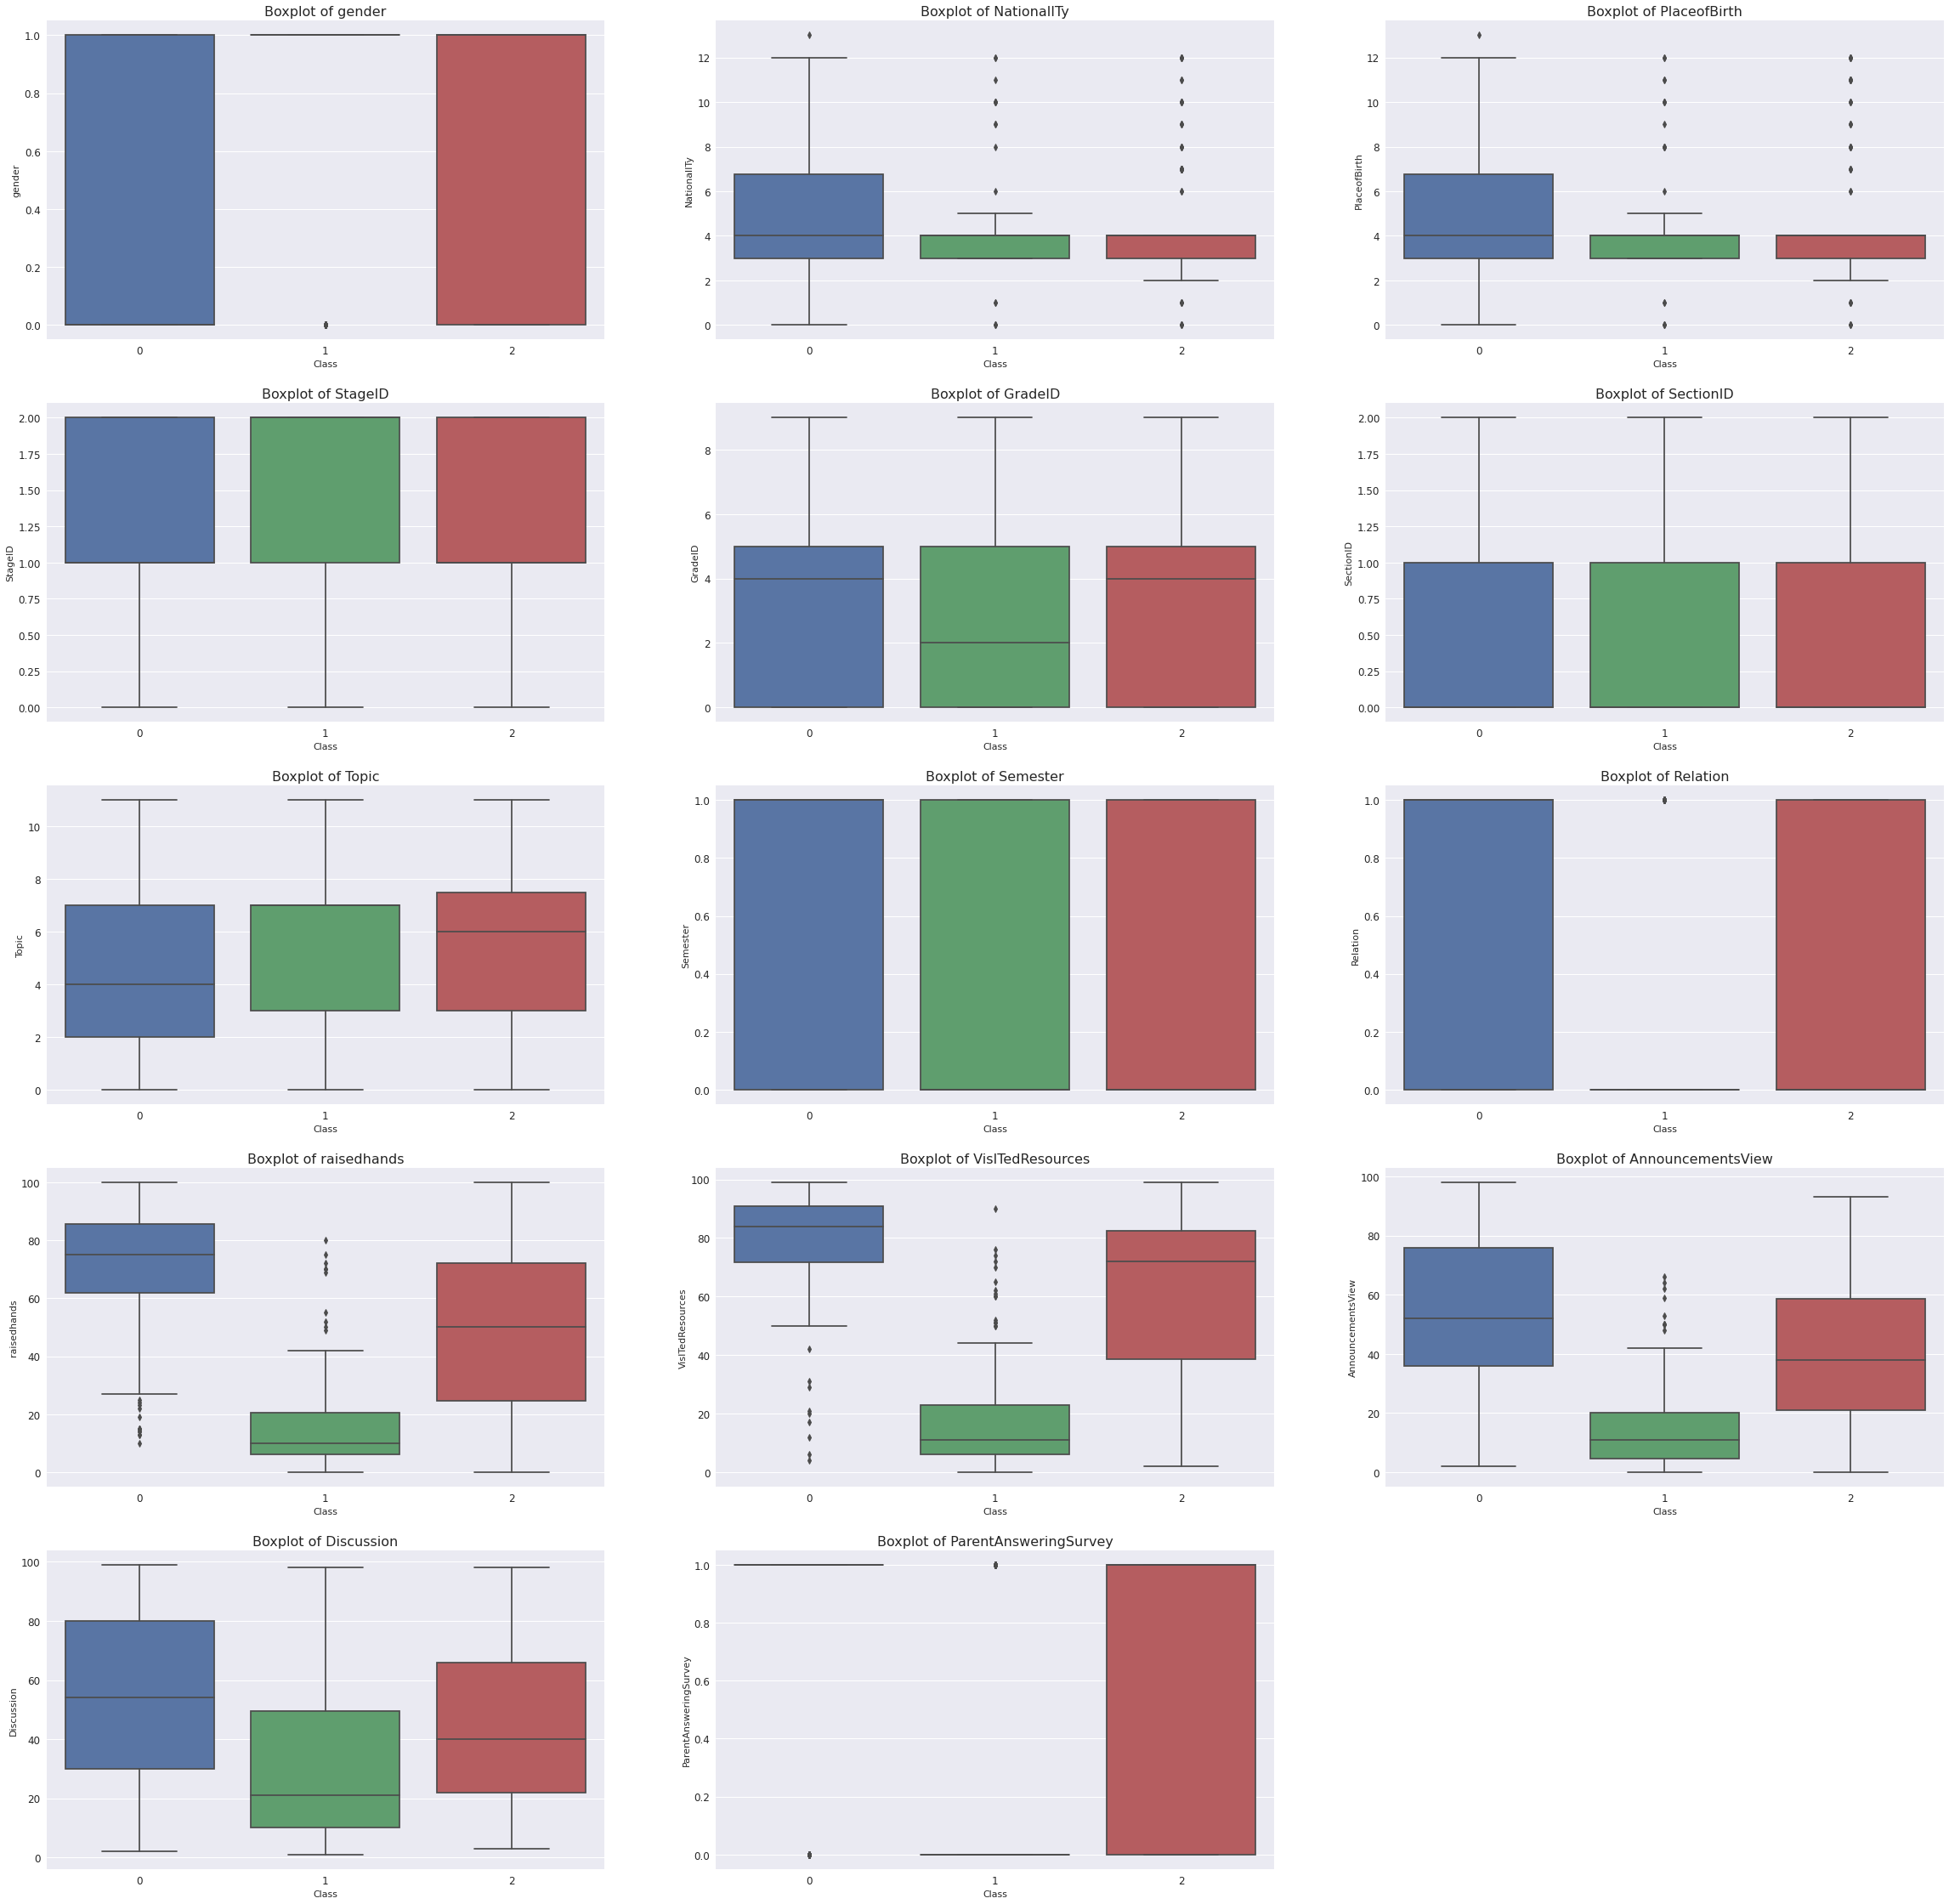

In [15]:
#Box Plotting All features distribution corresponding Target column
i=1
plt.figure(figsize=(40,40))
for c in df.columns[:14]:
    plt.subplot(5,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['Class'])
    i+=1
plt.show()

# Skewness of Data

In [16]:
# the data columns
cols = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                'SectionID', 'Topic', 'Semester', 'Relation','ParentAnsweringSurvey',
                'ParentschoolSatisfaction','StudentAbsenceDays']

target = ["Class"]

In [17]:
import scipy.stats as stats
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

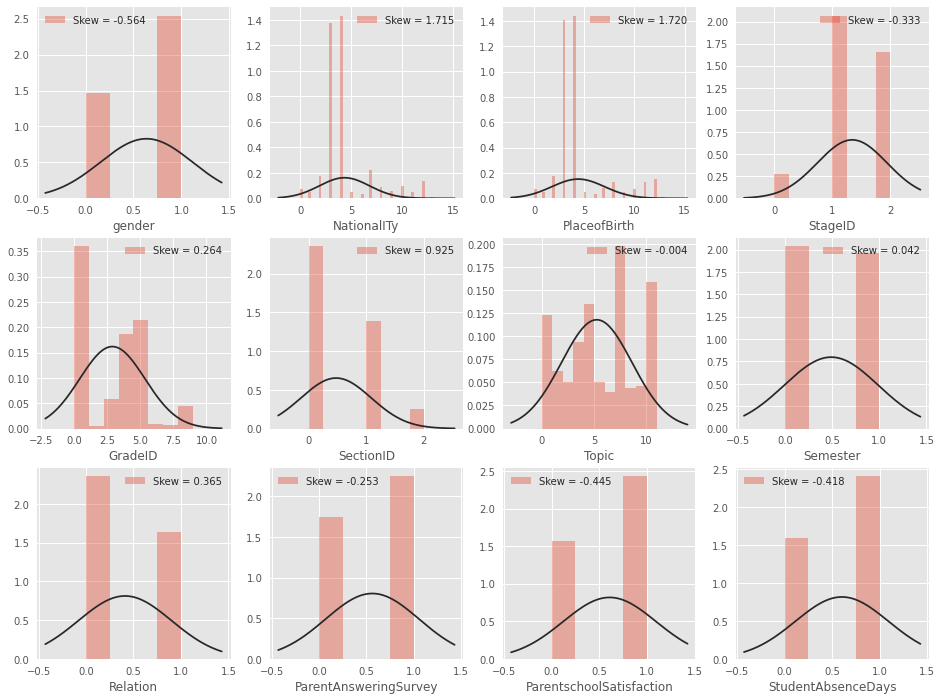

In [18]:
fig,ax = plt.subplots(3,4, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

Some of the features are normally distributed and some have outliers

Note: Outlier treatment maybe done to check impact on classification

In [19]:
#checking the target variable countplot

print("Class :", df["Class"].unique())
print()

print("Value Count :\n",df["Class"].value_counts())

Class : [2 1 0]

Value Count :
 2    211
0    142
1    127
Name: Class, dtype: int64


In [20]:
len(df["Class"].value_counts())

3

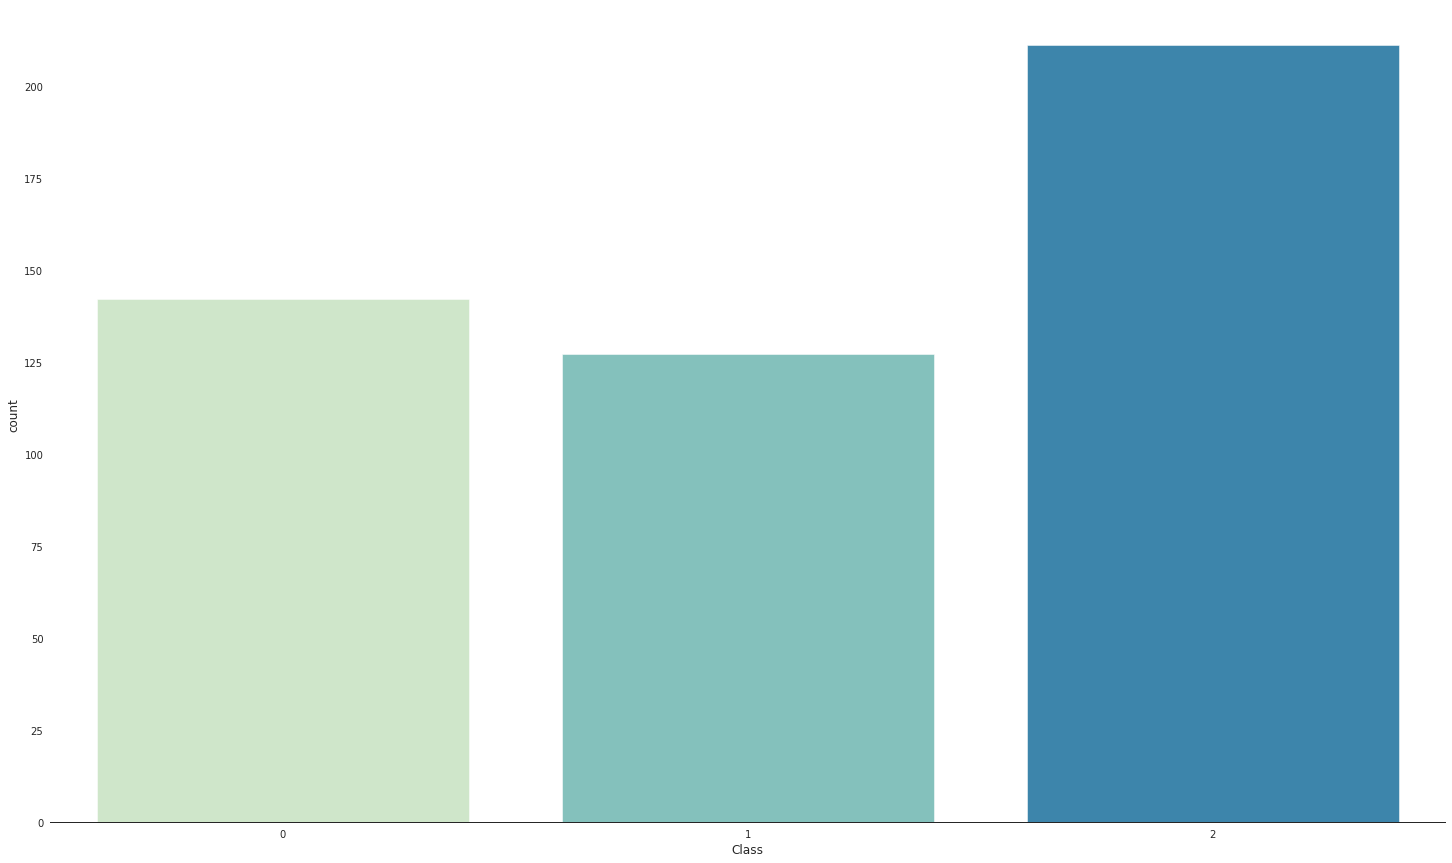

In [21]:
#checking the target variable countplot

plt.figure(figsize=(25,15))
sns.set_style('white')
sns.countplot(x='Class', data = df, palette='GnBu')
sns.despine(left=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


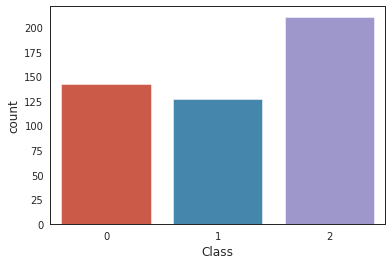

In [22]:
sns.countplot(df["Class"])
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


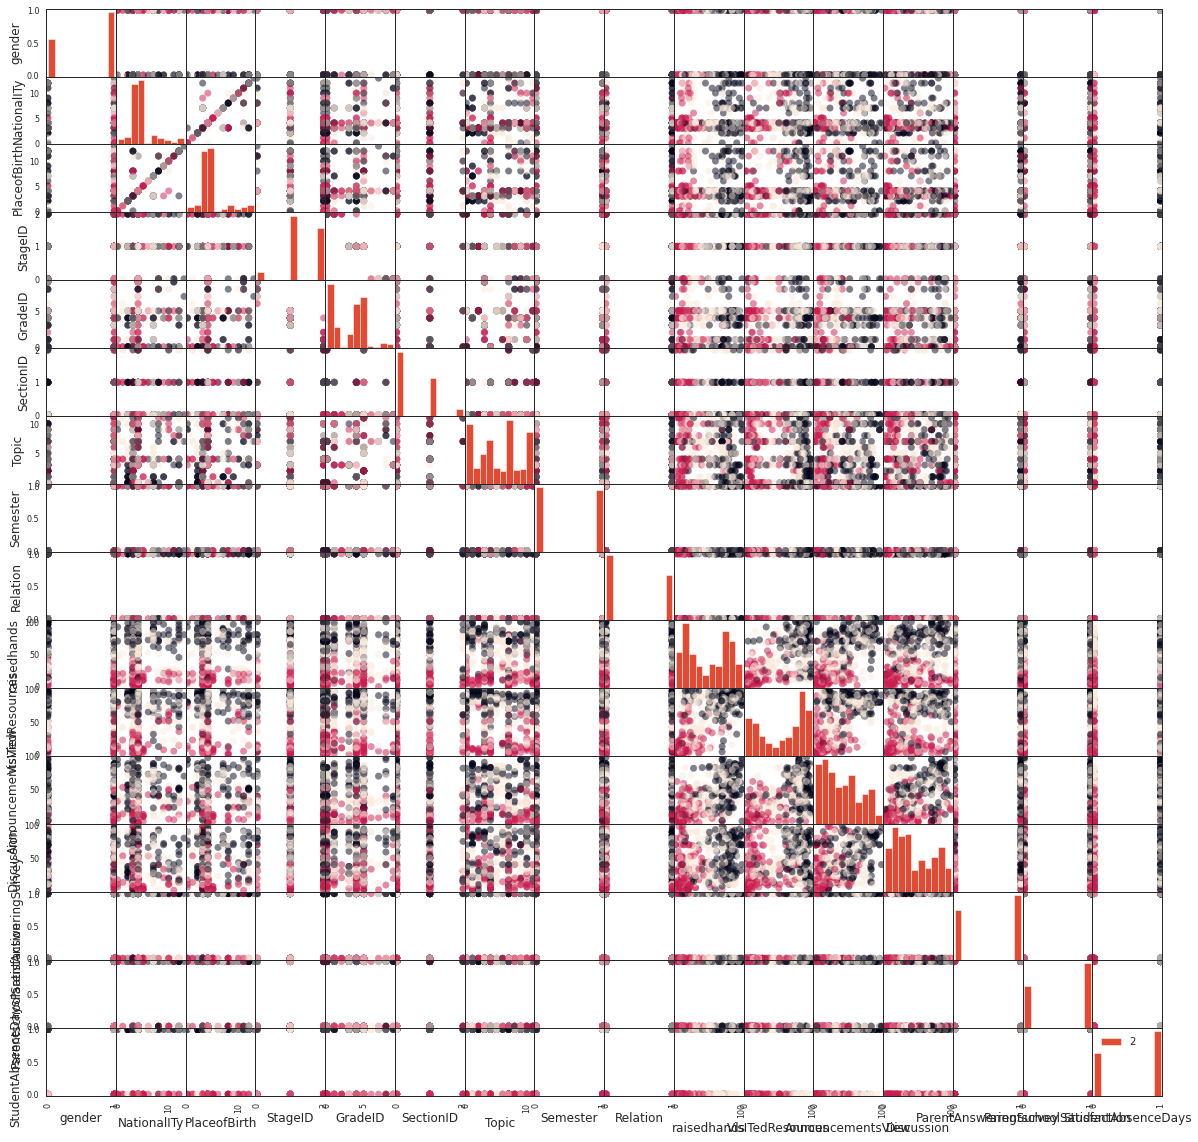

In [23]:
#Scatter Matrix
pd.plotting.scatter_matrix(df.iloc[:,:-1], c=df.iloc[:,-1], figsize=(20, 20), marker='o')
plt.legend(df["Class"].unique())
plt.show()


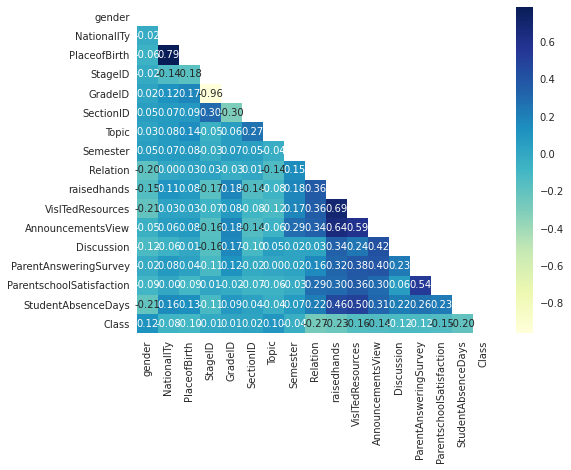

In [24]:
#Correlation Plot
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='YlGnBu', mask=mask)
plt.show()

If u want to more EDA Analysis for this data, u can see also 2 more notebooks
1. --https://www.kaggle.com/harunshimanto/student-s-academic-performance-with-ml-eda


# Statistical Importance Check for Variable

In [25]:
import statsmodels.api as sm
import statsmodels.stats as sms

for col in cols:
    data = sm.formula.ols(col+"~ Class", data=df).fit()
    pval = sms.anova.anova_lm(data)["PR(>F)"][0]
    print(f"Pval for {col}: {pval}")

Pval for gender: 0.006668794210196056
Pval for NationalITy: 0.08869632676054756
Pval for PlaceofBirth: 0.030150612059720958
Pval for StageID: 0.7982705981319885
Pval for GradeID: 0.7682750642185647
Pval for SectionID: 0.7005608502648171
Pval for Topic: 0.0231965756459745
Pval for Semester: 0.3439699262154796
Pval for Relation: 1.354136173410549e-09
Pval for ParentAnsweringSurvey: 0.006858545631295868
Pval for ParentschoolSatisfaction: 0.0013103237319858781
Pval for StudentAbsenceDays: 1.1108751098317325e-05


# Part 2

# Data Preprocessing & Evaluation Functions

In [26]:
seed = 42

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,\
                            BaggingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

In [27]:
# split the data into train and test
def split_data(X, Y, seed=42, train_size=0.8):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=train_size, random_state = seed, stratify=Y)
    xtrain, xtest = preprocess(xtrain, xtest)
    return (xtrain, xtest, ytrain, ytest)

# preprocess the data for training
def preprocess(x1, x2=None):
    sc = StandardScaler()
    x1 = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)
    if x2 is not None:
        x2 = pd.DataFrame(sc.transform(x2), columns=x2.columns)
        return (x1,x2)
    return x1

# for model evaluation and training
def eval_model(model, X, Y, seed=1):
    xtrain, xtest, ytrain, ytest = split_data(X, Y)
    model.fit(xtrain, ytrain)
    
    trainpred = model.predict(xtrain)
    trainpred_prob = model.predict_proba(xtrain)
    testpred = model.predict(xtest)
    testpred_prob = model.predict_proba(xtest)
    
    print("Train ROC AUC : %.4f"%roc_auc_score(ytrain, trainpred_prob, multi_class='ovr'))
    print("\nTrain classification report\n",classification_report(ytrain, trainpred))
    
    ### make a bar chart for displaying the wrong classification of one class coming in which other class
    
    print("\nTest ROC AUC : %.4f"%roc_auc_score(ytest, testpred_prob, multi_class='ovr'))
    print("\nTest classification report\n",classification_report(ytest, testpred))
    
def plot_importance(columns, importance):
    plt.bar(columns, importance)
    plt.show()

In [28]:
df=df.drop(['NationalITy', 'PlaceofBirth', 'StageID', 'GradeID','SectionID',],axis = 1)

In [29]:
#Feature Extraction, Importance & Splitting

Y= df['Class']

X = df.drop(['Class'],axis = 1)

In [30]:
X_sc = preprocess(X)

# Creating array of models

In [31]:
model_logr = LogisticRegression(random_state=seed,n_jobs=-1)
model_nb = GaussianNB()
model_dt = DecisionTreeClassifier(random_state=seed)
model_dt_bag = BaggingClassifier(model_dt, random_state=seed, n_jobs=-1)
model_ada = AdaBoostClassifier(random_state=seed)
model_gbc = GradientBoostingClassifier(random_state=seed)
model_rf = RandomForestClassifier(random_state=seed, n_jobs=-1)
model_xgb = XGBClassifier(random_state=seed)
model_lgbm = LGBMClassifier(random_state=seed, n_jobs=-1)
model_knn = KNeighborsClassifier(n_jobs=-1)

In [32]:
models = []
models.append(('LR',model_logr))
models.append(('NB',model_nb))
models.append(('DT',model_dt))
models.append(('Bag',model_dt_bag))
models.append(('Ada',model_ada))
models.append(('GBC',model_gbc))
models.append(('RF',model_rf))
models.append(('XGB',model_xgb))
models.append(('LGBM',model_lgbm))
models.append(('KNN',model_knn))

# Running the algorithms

In [33]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

results = []
names = []

for name, model in models:
    scores = cross_val_score(model, X_sc, Y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    accuracy = scores.mean()
    std = scores.std()
    print(f"{name} : Mean ROC {accuracy} STD:({std})")
    results.append(scores)
    names.append(name)

LR : Mean ROC 0.7463126193565481 STD:(0.015760762918235183)
NB : Mean ROC 0.7418576440966586 STD:(0.027937262199409972)
DT : Mean ROC 0.7050059345572698 STD:(0.03284738327870413)
Bag : Mean ROC 0.7388608860166299 STD:(0.022968065690930267)
Ada : Mean ROC 0.6412949998860117 STD:(0.054119731440152245)
GBC : Mean ROC 0.7374574791291867 STD:(0.04616534148404595)
RF : Mean ROC 0.7865122298020097 STD:(0.030732148128747947)
XGB : Mean ROC 0.74276546105539 STD:(0.03827815003957478)
LGBM : Mean ROC 0.73449026084634 STD:(0.040504363758925584)
KNN : Mean ROC 0.6937726488774685 STD:(0.02776757731294599)


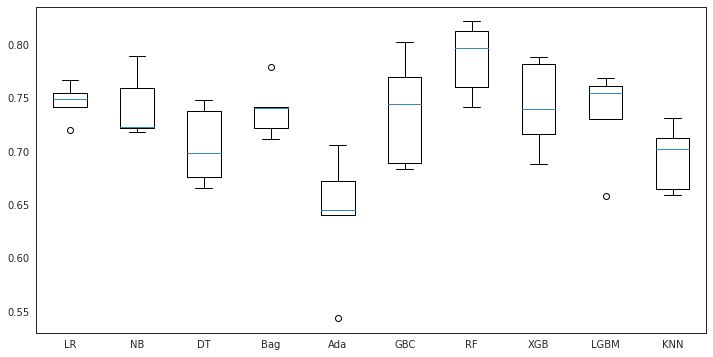

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Suggestions: for better improvement..You need to do some feature engineering. And Feature importances

## Final/Extra/ Part -3; using Deep Learning Algorithm ******************** Without feature cleaning

In [35]:
s.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,3,3,2,1,1,10,1,0,42,34,29,39,0,1,0,2
1,0,4,4,1,3,0,7,1,0,50,40,52,66,1,0,1,2
2,1,4,4,1,5,0,11,1,0,5,3,2,10,1,1,1,1
3,0,3,3,1,3,0,3,0,1,90,84,52,30,0,1,1,0
4,1,3,3,2,0,1,4,0,1,40,87,50,41,0,0,1,2


In [36]:
df=s.copy()

In [37]:
#Feature Extraction, Importance & Splitting

Y= df['Class']

X = df.drop(['Class'],axis = 1)

In [38]:

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8,random_state=42)

In [39]:
from keras.utils import to_categorical
y_train = to_categorical(y_train , num_classes=3)
y_test = to_categorical(y_test , num_classes=3)

In [40]:
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0

In [41]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(384, 16) (384, 3)
(96, 16) (96, 3)


In [42]:
#Keras
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dense, Dropout , BatchNormalization
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

#tf 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(3,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               6

In [44]:
r_mm = model.fit(X_train,
                 y_train,epochs = 20,
                 validation_data=(X_test, y_test))

Epoch 1/20
12/12 [==============================] - 3s 93ms/step - loss: 1.6348 - accuracy: 0.3774 - val_loss: 0.9565 - val_accuracy: 0.5000
Epoch 2/20
12/12 [==============================] - 0s 9ms/step - loss: 0.9510 - accuracy: 0.6754 - val_loss: 0.9098 - val_accuracy: 0.6250
Epoch 3/20
12/12 [==============================] - 0s 9ms/step - loss: 0.9787 - accuracy: 0.6760 - val_loss: 0.8897 - val_accuracy: 0.6146
Epoch 4/20
12/12 [==============================] - 0s 9ms/step - loss: 0.7113 - accuracy: 0.7410 - val_loss: 0.8733 - val_accuracy: 0.6042
Epoch 5/20
12/12 [==============================] - 0s 9ms/step - loss: 0.7422 - accuracy: 0.6979 - val_loss: 0.8359 - val_accuracy: 0.6250
Epoch 6/20
12/12 [==============================] - 0s 9ms/step - loss: 0.6263 - accuracy: 0.7619 - val_loss: 0.8304 - val_accuracy: 0.6250
Epoch 7/20
12/12 [==============================] - 0s 8ms/step - loss: 0.6349 - accuracy: 0.7594 - val_loss: 0.7951 - val_accuracy: 0.6562
Epoch 8/20
12/12 [=

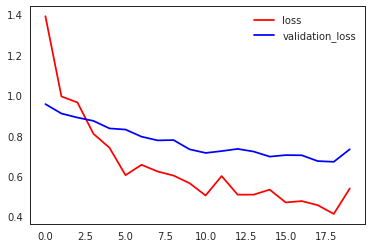

In [45]:
plt.plot(r_mm.history['loss'],label = 'loss',color = 'red')
plt.plot(r_mm.history['val_loss'],label = 'validation_loss',color = 'blue')
plt.legend()
plt.show()

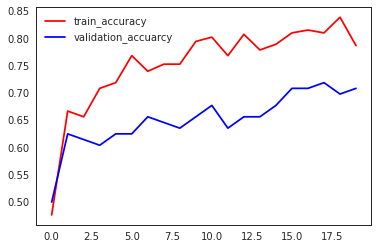

In [46]:
plt.plot(r_mm.history['accuracy'],label = 'train_accuracy',color = 'red')
plt.plot(r_mm.history['val_accuracy'],label = 'validation_accuarcy',color = 'blue')
plt.legend()
plt.show()

In [47]:
prediction = model.predict(X_test)

In [48]:
prediction = (prediction > 0.5)

In [49]:
from sklearn import metrics

In [50]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.43      0.54        30
           1       0.85      0.81      0.83        21
           2       0.66      0.84      0.74        45

   micro avg       0.71      0.71      0.71        96
   macro avg       0.74      0.70      0.70        96
weighted avg       0.72      0.71      0.70        96
 samples avg       0.71      0.71      0.71        96



In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [52]:
fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, 
          batch_size=62, verbose=True, callbacks=[best_model, early_stop])

Epoch 1/100
7/7 [==============================] - 1s 46ms/step - loss: 0.3874 - accuracy: 0.8359 - val_loss: 0.7170 - val_accuracy: 0.7396
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.4130 - accuracy: 0.8359 - val_loss: 0.7225 - val_accuracy: 0.7292
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3501 - accuracy: 0.8724 - val_loss: 0.7263 - val_accuracy: 0.7604
Epoch 00003: early stopping


In [53]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: ', score[1]*100)
print( 'loss:', score[0]*100)

3/3 [==============================] - 0s 3ms/step - loss: 0.7263 - accuracy: 0.7604
Accuracy:  76.04166865348816
loss: 72.6269006729126


In [54]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

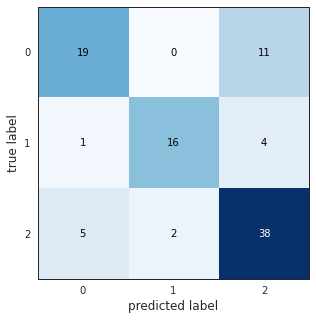

In [55]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
plt.show()

In [56]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.89      0.76      0.82        21
           2       0.72      0.84      0.78        45

    accuracy                           0.76        96
   macro avg       0.79      0.75      0.76        96
weighted avg       0.77      0.76      0.76        96



# Additional Deep Neural Parts; Another DL algorithm from Different way

In [57]:
data = pd.read_csv('../input/xAPI-Edu-Data/xAPI-Edu-Data.csv')

In [58]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [60]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

In [61]:
get_uniques(data, get_categorical_columns(data))

{'gender': ['M', 'F'],
 'NationalITy': ['KW',
  'lebanon',
  'Egypt',
  'SaudiArabia',
  'USA',
  'Jordan',
  'venzuela',
  'Iran',
  'Tunis',
  'Morocco',
  'Syria',
  'Palestine',
  'Iraq',
  'Lybia'],
 'PlaceofBirth': ['KuwaIT',
  'lebanon',
  'Egypt',
  'SaudiArabia',
  'USA',
  'Jordan',
  'venzuela',
  'Iran',
  'Tunis',
  'Morocco',
  'Syria',
  'Iraq',
  'Palestine',
  'Lybia'],
 'StageID': ['lowerlevel', 'MiddleSchool', 'HighSchool'],
 'GradeID': ['G-04',
  'G-07',
  'G-08',
  'G-06',
  'G-05',
  'G-09',
  'G-12',
  'G-11',
  'G-10',
  'G-02'],
 'SectionID': ['A', 'B', 'C'],
 'Topic': ['IT',
  'Math',
  'Arabic',
  'Science',
  'English',
  'Quran',
  'Spanish',
  'French',
  'History',
  'Biology',
  'Chemistry',
  'Geology'],
 'Semester': ['F', 'S'],
 'Relation': ['Father', 'Mum'],
 'ParentAnsweringSurvey': ['Yes', 'No'],
 'ParentschoolSatisfaction': ['Good', 'Bad'],
 'StudentAbsenceDays': ['Under-7', 'Above-7'],
 'Class': ['M', 'L', 'H']}

In [62]:
binary_features = ['gender', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

ordinal_features = ['StageID', 'GradeID']

nominal_features = ['NationalITy', 'PlaceofBirth', 'SectionID', 'Topic']


target_column = 'Class'

In [63]:
binary_positive_values = ['M', 'S', 'Father', 'Yes', 'Good', 'Above-7']

stage_ordering = ['lowerlevel', 'MiddleSchool', 'HighSchool']
grade_ordering = [
    'G-02',
    'G-04',
    'G-05',
    'G-06',
    'G-07',
    'G-08',
    'G-09',
    'G-10',
    'G-11',
    'G-12'
]

nominal_prefixes = ['N', 'B', 'S', 'T']

In [64]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [65]:
for feature, positive_value in zip(binary_features, binary_positive_values):
    data = binary_encode(data, feature, positive_value)

In [66]:
data = ordinal_encode(data, 'StageID', stage_ordering)
data = ordinal_encode(data, 'GradeID', grade_ordering)

In [67]:
for feature, prefix in zip(nominal_features, nominal_prefixes):
    data = onehot_encode(data, feature, prefix)

In [68]:
target_ordering = ['L', 'M', 'H']
data = ordinal_encode(data, target_column, target_ordering)

In [69]:
data

,gender,StageID,GradeID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,N_Egypt,N_Iran,N_Iraq,N_Jordan,N_KW,N_Lybia,N_Morocco,N_Palestine,N_SaudiArabia,N_Syria,N_Tunis,N_USA,N_lebanon,N_venzuela,B_Egypt,B_Iran,B_Iraq,B_Jordan,B_KuwaIT,B_Lybia,B_Morocco,B_Palestine,B_SaudiArabia,B_Syria,B_Tunis,B_USA,B_lebanon,B_venzuela,S_A,S_B,S_C,T_Arabic,T_Biology,T_Chemistry,T_English,T_French,T_Geology,T_History,T_IT,T_Math,T_Quran,T_Science,T_Spanish
0,1,0,1,0,1,15,16,2,20,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,1,20,20,3,25,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,1,10,7,0,30,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,1,30,25,5,35,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,1,40,50,12,50,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,1,5,1,1,5,4,5,8,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
476,0,1,5,0,1,50,77,14,28,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
477,0,1,5,1,1,55,74,25,29,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
478,0,1,5,0,1,30,17,14,57,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Splitting and Scaling

In [70]:
y = data[target_column]
X = data.drop(target_column, axis=1)

In [71]:

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [72]:
X.shape

(480, 55)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

In [74]:
inputs = tf.keras.Input(shape=(55,))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x= Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [75]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [76]:
batch_size = 64
epochs = 10

history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/10
6/6 [==============================] - 1s 43ms/step - loss: 1.1578 - accuracy: 0.2901 - val_loss: 1.0521 - val_accuracy: 0.3846
Epoch 2/10
6/6 [==============================] - 0s 13ms/step - loss: 1.0320 - accuracy: 0.4588 - val_loss: 0.9824 - val_accuracy: 0.5641
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 0.9849 - accuracy: 0.4923 - val_loss: 0.9081 - val_accuracy: 0.6410
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 0.9206 - accuracy: 0.5471 - val_loss: 0.8320 - val_accuracy: 0.6923
Epoch 5/10
6/6 [==============================] - 0s 13ms/step - loss: 0.8185 - accuracy: 0.6391 - val_loss: 0.7601 - val_accuracy: 0.5897
Epoch 6/10
6/6 [==============================] - 0s 12ms/step - loss: 0.7930 - accuracy: 0.6521 - val_loss: 0.6918 - val_accuracy: 0.6154
Epoch 7/10
6/6 [==============================] - 0s 15ms/step - loss: 0.7138 - accuracy: 0.6883 - val_loss: 0.6336 - val_accuracy: 0.6154
Epoch 8/10
6/6 [===========

In [77]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Training and Validation Loss"
)

fig.show()

In [78]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.7396


[0.6522123217582703, 0.7395833134651184]

Suggestions: Deep Neural Networks doesn't perform well ..bcz Data size is too small. If you want to use deep learning algorithms, you must need to high dimentional data.Otherwise, it's not good choice/habit for Any AI task